In [4]:
!curl -L -k https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \ -O /tmp/sign-language-img.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 45 23.1M   45 10.4M    0     0  12.4M      0  0:00:01 --:--:--  0:00:01 12.5M
100 23.1M  100 23.1M    0     0  18.2M      0  0:00:01  0:00:01 --:--:-- 18.2M
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: No host part in the URL


In [9]:
import os
import zipfile

local_zip = "sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("sign-language-img")
zip_ref.close()

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = "sign-language-img/Train"
test_dir = "sign-language-img/Test"

In [5]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]

In [8]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [9]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

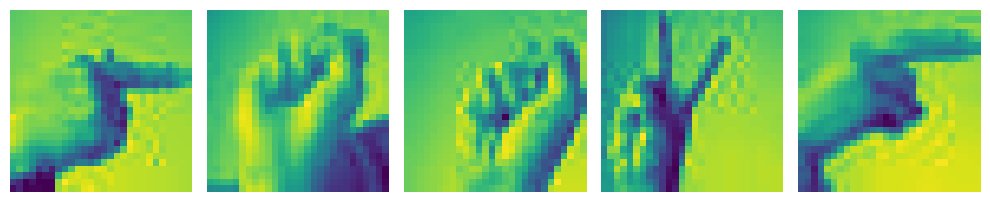

In [10]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [11]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

d:\david\learning_platzi\machine_learning\redes_neuronales_tensorflow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 149s 680ms/step - accuracy: 0.3590 - loss: 2.1770 - val_accuracy: 0.4891 - val_loss: 1.6490
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.6301 - loss: 1.2015 - val_accuracy: 0.5354 - val_loss: 1.3747
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7364 - loss: 0.8631 - val_accuracy: 0.6309 - val_loss: 1.2202
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8031 - loss: 0.6486 - val_accuracy: 0.6772 - val_loss: 1.0684
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8530 - loss: 0.4976 - val_accuracy: 0.6814 - val_loss: 1.0669
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8810 - loss: 0.4025 - val_accuracy: 0.6800 - val_loss: 1.0172
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9168 - loss: 0.3030 - val_accuracy: 0.7179 - val_loss: 0.9935
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9324 - loss: 0.2463 - val_a

In [14]:
results = model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 515ms/step - accuracy: 0.7600 - loss: 1.1255


In [15]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

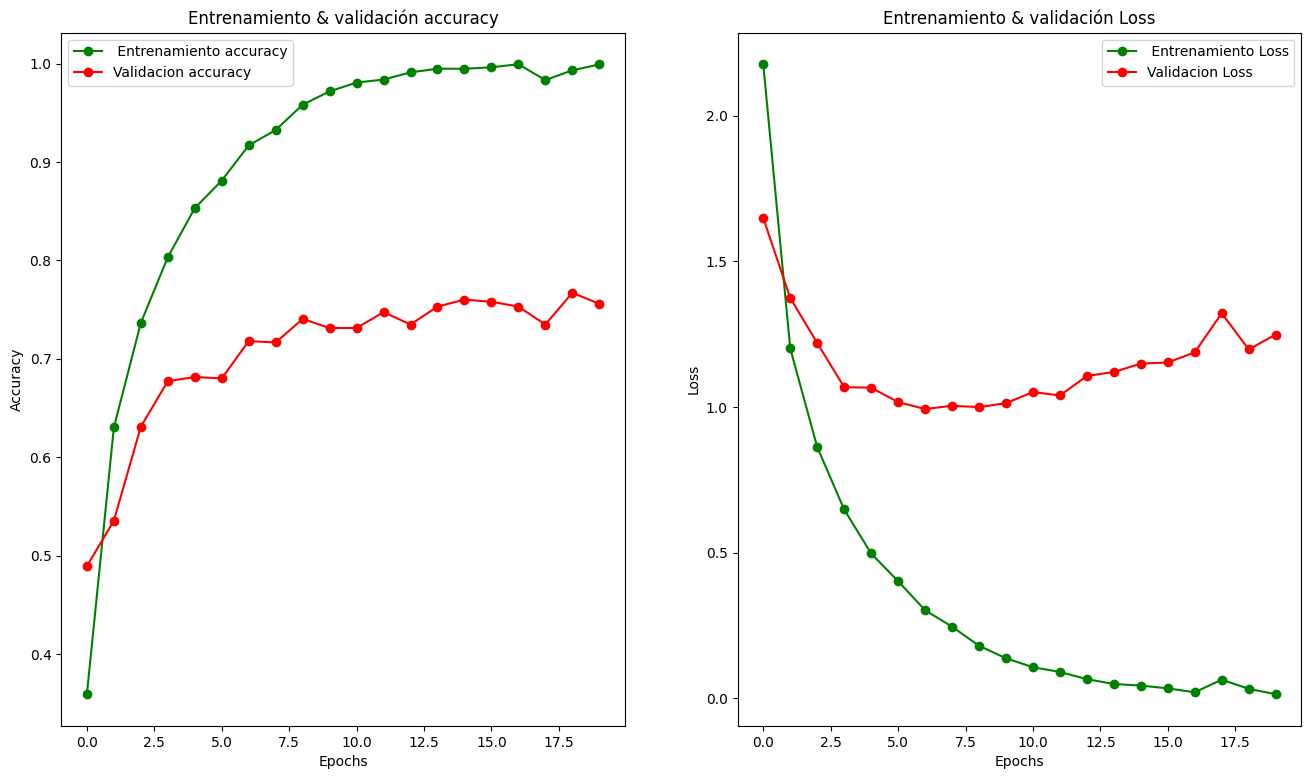

In [16]:
visualizacion_resultados(history)

In [17]:
from tensorflow.keras import regularizers

In [18]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.2426 - loss: 2.4891 - val_accuracy: 0.4632 - val_loss: 1.7973
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4907 - loss: 1.5493 - val_accuracy: 0.5270 - val_loss: 1.4742
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6024 - loss: 1.1917 - val_accuracy: 0.6281 - val_loss: 1.1616
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6782 - loss: 0.9636 - val_accuracy: 0.6547 - val_loss: 1.0486
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7271 - loss: 0.8154 - val_accuracy: 0.6849 - val_loss: 0.9681
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7643 - loss: 0.7007 - val_accuracy: 0.7144 - val_loss: 0.8867
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7969 - loss: 0.6109 - val_accuracy: 0.7172 - val_loss: 0.9076
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8211 - loss: 0.5308 - val_accu

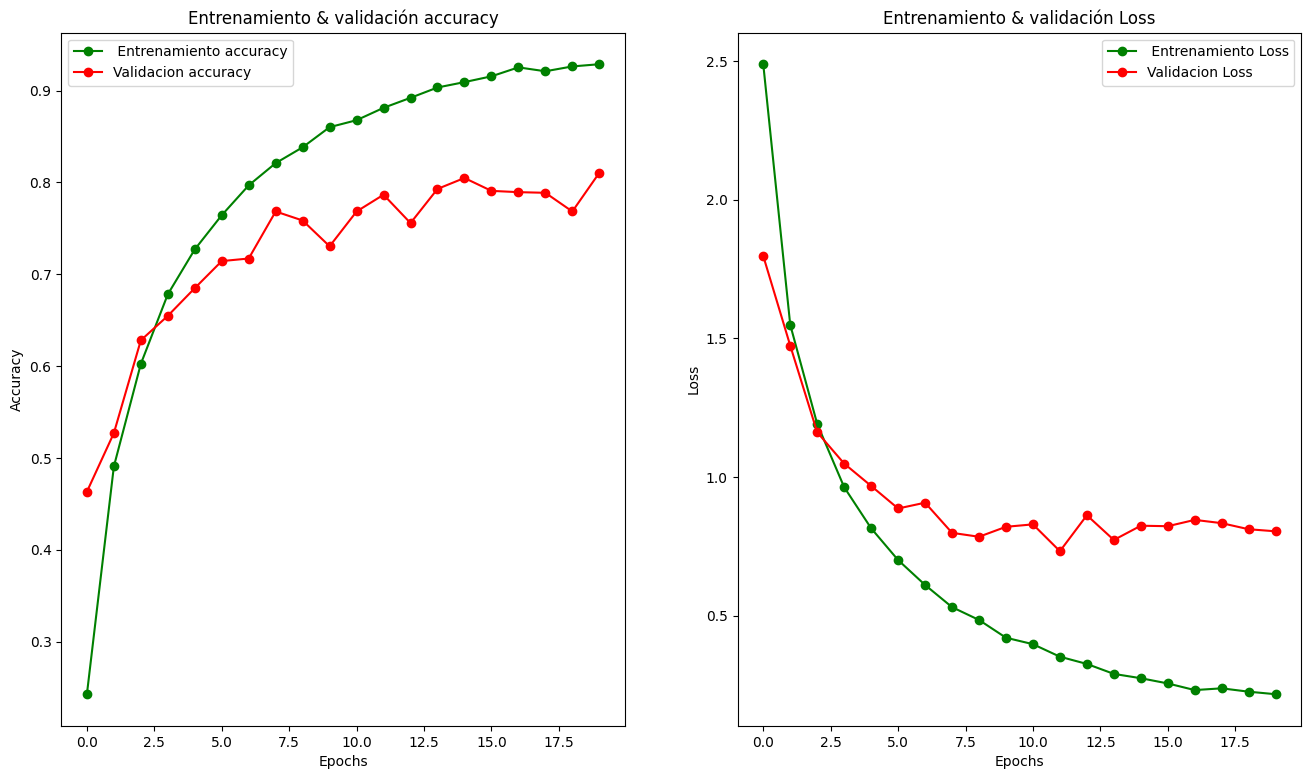

In [20]:
visualizacion_resultados(history_optimizer)